# Laplace approximation - 01 

_Adapted from Josep Fortiana (2023-05-22) by Jordi Abante (2024-05-13)_

From Rasmus Bååth blog: 
[Easy Laplace Approximation of Bayesian Models in R,](http://www.sumsar.net/blog/2013/11/easy-laplace-approximation/) by 

# 01 - Model: likelihood, prior, non normalized posterior

Binomial likelihood - Uniform prior

In [1]:
n1<-10
n0<-8
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

# 02 - Laplace approximation

We are trying to approximate the posterior $q(\theta)=p(\theta\mid x)$ with a normal distribution. We know that the posterior is a binomial distribution, since the non-normalized posterior is equal to the joint, which in turn is just the binomial. Note that the MLE and MAP estimates coincide because of uniform prior as well.

In [2]:
# q=log(Lik)
# Equating q'(theta)=0
mu<-n1/n
round(mu,4)

[1] 0.5556

If $q(\theta)= n_1\log\theta + n_0 \log(1-\theta) + ct$, then $q''(\theta)= -\frac{n_1}{\theta^2} - \frac{n_0}{(1-\theta)^2}$. Evaluating this at the MLE/MAP $\theta_0$ we get $\sigma^2=1/|q''(\theta_0)$:

In [3]:
# sigma2= 1/|q''(n1/n)|
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.0137

[1] 0.1171

Thus, the Laplace approximation is $\textrm{N}(n_1/n,n_1n_0/n^3)$. We can also compute the exact posterior to compare the two.

In [4]:
# Normalize to give the posterior pdf
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}

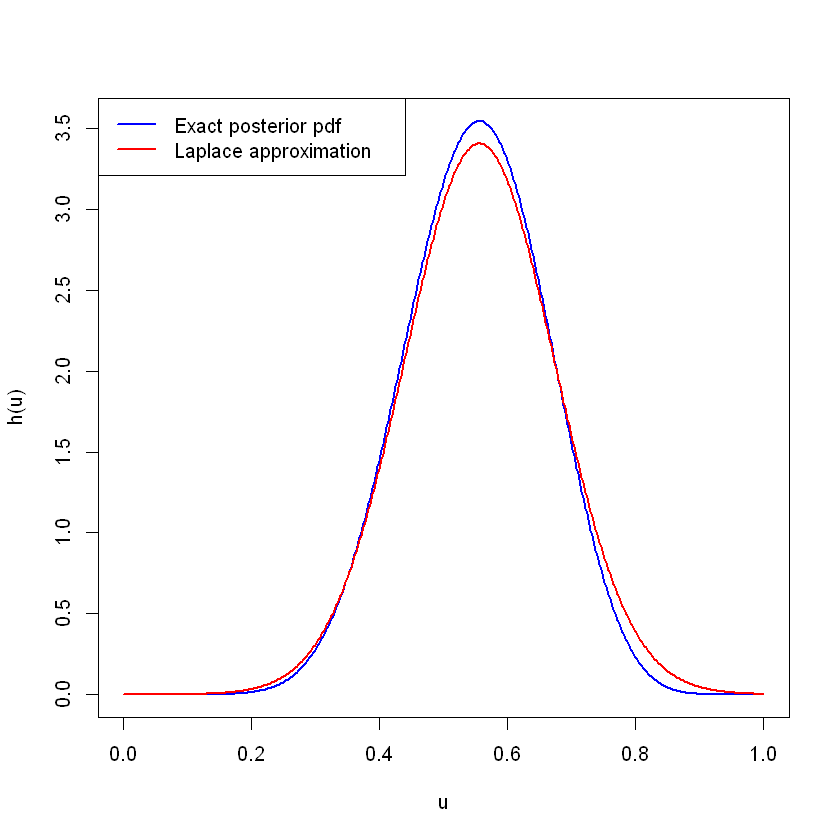

In [5]:
# Plot posterior pdf 
u<-seq(0,1,length=500)
options(repr.plot.width=7,repr.plot.height=7)
plot(u,h(u),"l",lwd=2,col="blue")
# Superimpose Laplace approximation
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
# Alternatively, using the fact that the model is Beta-Binomial, thus the posterior is
# Beta(n1+1,n0+1)
# lines(u,dbeta(u,shape1=n1+1,shape2=n0+1),col="green",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

# 03 - Same Laplace approximation, now with number of heads $n_{1}=4$ and $n_{0}=2$

Here we only change the observed data. Note that $n$ is smaller in this case.

In [6]:
n1<-4
n0<-2
n<-n0+n1
Lik<-function(theta){theta^n1*(1-theta)^n0}
# Prior is uniform (constant = 1). 
# Joint coincides with Lik
# Non normalized posterior is equal to the Joint
nnh<-Lik

In [7]:
mu<-n1/n
round(mu,4)
sigma2<-n1*n0/n^3
round(sigma2,4)
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.6667

[1] 0.037

[1] 0.1925

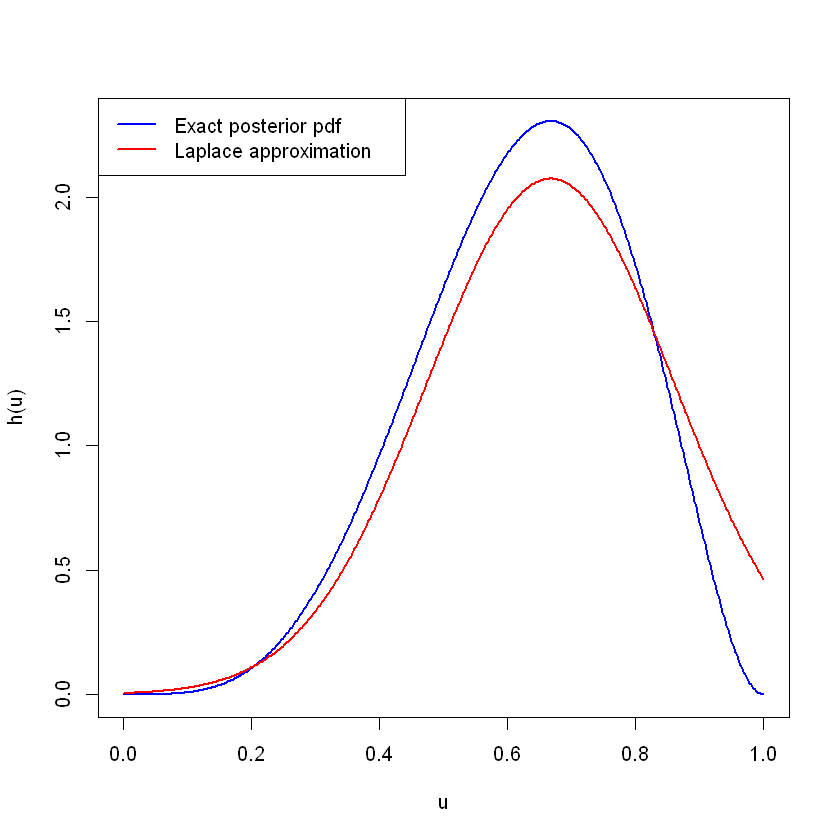

In [8]:
Z<-integrate(nnh,0,1)$value
h<-function(t){nnh(t)/Z}
u<-seq(0,1,length=500)
options(repr.plot.width=7,repr.plot.height=7)
plot(u,h(u),"l",lwd=2,col="blue")
lines(u,dnorm(u,mean=mu,sd=sigma),col="red",lwd=2)
legend("topleft",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

A worse approximation: posterior was more asymmetric. This is due to the fact that the binomial distribution approximates a normal distribution in the limit. In this case, however, we were further from this assymptotic behavior than in the previous example.

# 04 - Normal data with a known $\mu$ and unknown $\sigma$ (parameter to investigate)
 
### Flat prior for $\sigma$

Likelihood is normal with known $\mu$ and unknown standard deviation $\sigma$.

Assume a flat prior for $\sigma$.

Laplace approximate posterior of the standard deviation $\sigma$.

Generate a sample of $n$ random numbers distributed as $\normaldist(10, 4)$. 

In [9]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(extraDistr)

Loading required package: extraDistr



In [10]:
mu<-10
n<-40  # n was 8 in the original post
sigma.data.gen<-4
x<-rnorm(n = n, mean = mu, sd = sigma.data.gen)
## [1] 10.770  4.213  8.707 16.489  7.244 18.168 13.775 18.328
str(x) 

 num [1:40] 4.1 11.69 15.53 9.96 4.22 ...


## Deriving Laplace approximation

### Likelihood = Non-normalized posterior (flat prior)

$$
    \cL (\sigma)= (2\pi)^{-\,n/2}\cdot \sigma^{-\,n}\cdot\exp\left\{-\,\dfrac{1}{2\sigma^{2}}\sum_{i=1}^{n}(x_{i}-\mu)^{2}\right\}
$$

### Log-likelihood

$$
    q(\sigma)=\log\cL (\sigma)= -\,\dfrac{n}{2}\,\log(2\pi) -\,n\cdot\log(\sigma) -\,\dfrac{n}{2\sigma^{2}}\cdot s^{2}(\mu),
    \mskip40mu\text{where}\mskip10mu s^{2}(\mu)=\dfrac{1}{n}\,\sum_{i=1}^{n}(x_{i}-\mu)^{2}
$$

### First derivative and ML estimate of $\sigma^{2}$ $=$ MAP (mode of the posterior pdf)

$$
    q'(\sigma)= -\,\dfrac{n}{\sigma}+\dfrac{n}{\sigma^{3}}\cdot s^{2}(\mu),
$$

Equating to zero,

$$
    \hat{\sigma}^{2}=\operatorname{MAP}(\sigma)=s^{2}(\mu)
$$

### Second derivative and variance of Laplace approximation

$$
    q''(\sigma)= \dfrac{n}{\sigma^{2}}-\dfrac{3\,n}{\sigma^{4}}\cdot s^{2}(\mu),
$$

At the mode: $\sigma=s(\mu)=\sqrt{s^{2}(\mu)}$.

$$
    q''(s(\mu))= \dfrac{n}{s^{2}(\mu)}-\,\dfrac{3\,n}{s^{2}(\mu)}=-\,\dfrac{2\,n}{s^{2}(\mu)}.
$$

Variance of Laplace approximation $=|\,q''(s(\mu))\,|$

In [11]:
s2mu<-sum((x-mu)^2)/n
Laplace.Approx.mean<-s2mu
Laplace.Approx.sd<-sqrt(2/n)*s2mu
round(c(Laplace.Approx.mean,Laplace.Approx.sd),4)

[1] 13.3110  2.9764

### Exact posterior pdf

Exact posterior pdf, in terms of $v=\sigma^{2}$ is:

$$
    h(v\,|\,x)\propto v^{-n/2}\cdot\big\{-\dfrac{n\,s^2(\mu)}{2\,v}\big\}.
$$

This is an inverse gamma distribution, $\operatorname{IG}(\alpha,\beta)$, where:

$$
    \left\{\begin{array}{ccl}
    \alpha &=&\dfrac{n}{2}-1,\\
    \beta  &=&\dfrac{n\,s^{2}(\mu)}{2}.
    \end{array}\right.
$$

In [12]:
alpha<-n/2-1
beta<-n*s2mu/2

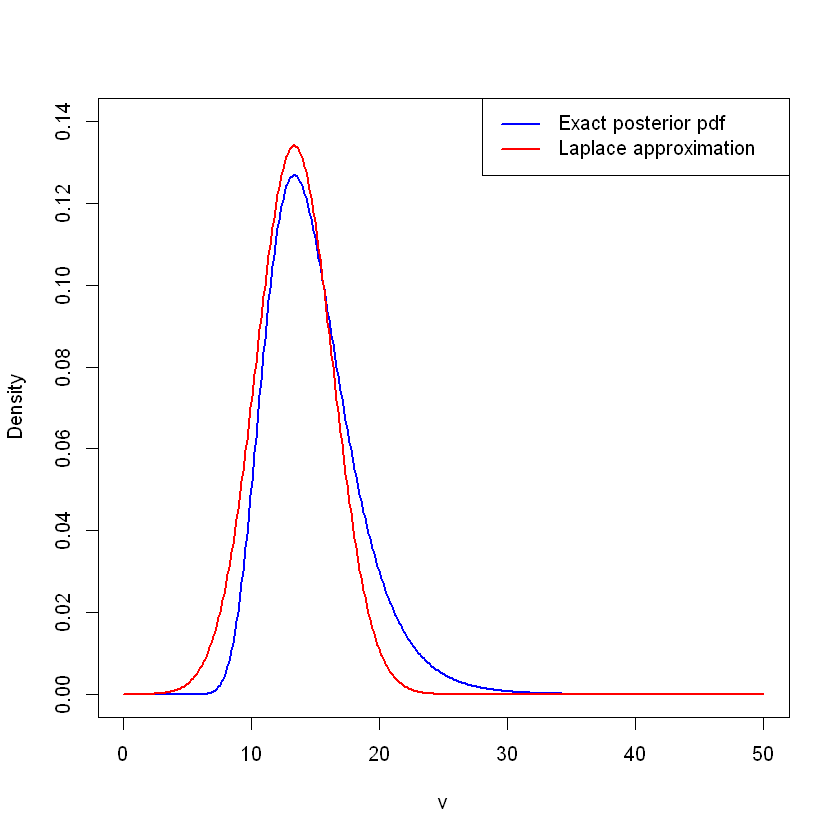

In [13]:
v<-seq(0,50,length=500)
y<-dinvgamma(v,alpha,beta)
y.max<-ceiling(50*max(y))/50
options(repr.plot.width=7, repr.plot.height=7)
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max),pin=c(3,3))
lines(v,dnorm(v,mean=Laplace.Approx.mean,sd=Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))

### With the normalized posterior pdf

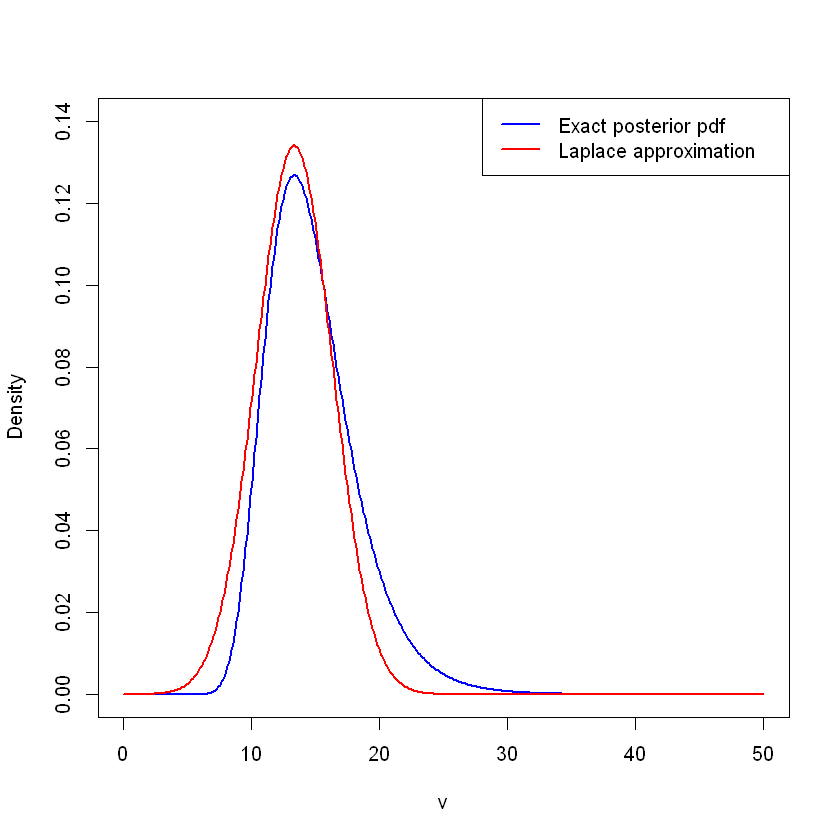

In [14]:
v<-seq(0.00001,50,length=500)
nnh<-function(v){v^{-n/2}*exp(-n*s2mu/(2*v))}
Z<-integrate(nnh,0.0001,50)$value
h<-function(t){nnh(t)/Z}
options(repr.plot.width=7, repr.plot.height=7)
y<-h(v)
#max(y)
y.max<-ceiling(50*max(y))/50
plot(v,y,type="l",lwd=2,col="blue",xlab="v",ylab="Density",ylim=c(0,y.max))
lines(v,dnorm(v,Laplace.Approx.mean,Laplace.Approx.sd),lwd=2,col="red")
legend("topright",lwd=2,legend=c("Exact posterior pdf","Laplace approximation"),col=c("blue","red"))